🚀 AUDITOR DE CÓDIGO - PROYECTO MIP QUILLOTA


Modo de ejecución:
1 - Automático (auditoría completa)
2 - Interactivo (menú)
Opción:  1
Selecciona tipo de auditoría:
1 - Completa (recomendado)
2 - Express (rápida)
Opción:  1


🌡️ AUDITORÍA COMPLETA - PROYECTO MIP QUILLOTA

1️⃣ REALIZANDO OVERVIEW DEL PROYECTO...
🌡️ PROYECTO MIP QUILLOTA - OVERVIEW
📊 Total notebooks encontrados: 14
  - 00_Sistema_Principal_MIP_Quillota.ipynb: 311.9 KB
  - 01_Configuracion_e_imports.ipynb: 36.8 KB
  - 02_Carga_y_Procesamiento_Datos.ipynb: 269.7 KB
  - 03_Analisis_Meteorologico.ipynb: 1719.2 KB
  - 04_Visualizaciones.ipynb: 3303.2 KB
  - 05_Modelos_ML.ipynb: 416.7 KB
  - Detector_errores.ipynb: 147.8 KB
  - Funcion_OpenMeteo.ipynb: 262.5 KB
  - MIP_Complete_Auditor.ipynb: 52.9 KB
  - MIP_Continuous_Monitor.ipynb: 12.6 KB
  - MIP_Quick_Fixes.ipynb: 6.4 KB
  - Proyect_Code_Auditor.ipynb: 237.1 KB
  - Run_Complete_Audit.ipynb: 6.4 KB
  - Sistema de Pronóstico Meteorológico y Gestión Agrícola MIP Quillota.ipynb: 885.5 KB

📁 Estructura de carpetas:
  ✅ data/: 3 archivos
  ✅ docs/: 0 archivos
  ✅ modelos_ml_quillota/: 5 archivos
  ✅ notebooks/: 0 archivos
  ✅ src/: 5 archivos
  ✅ tests/: 2 archivos

2️⃣ EJECUTANDO AUDITORÍA COMPLETA.

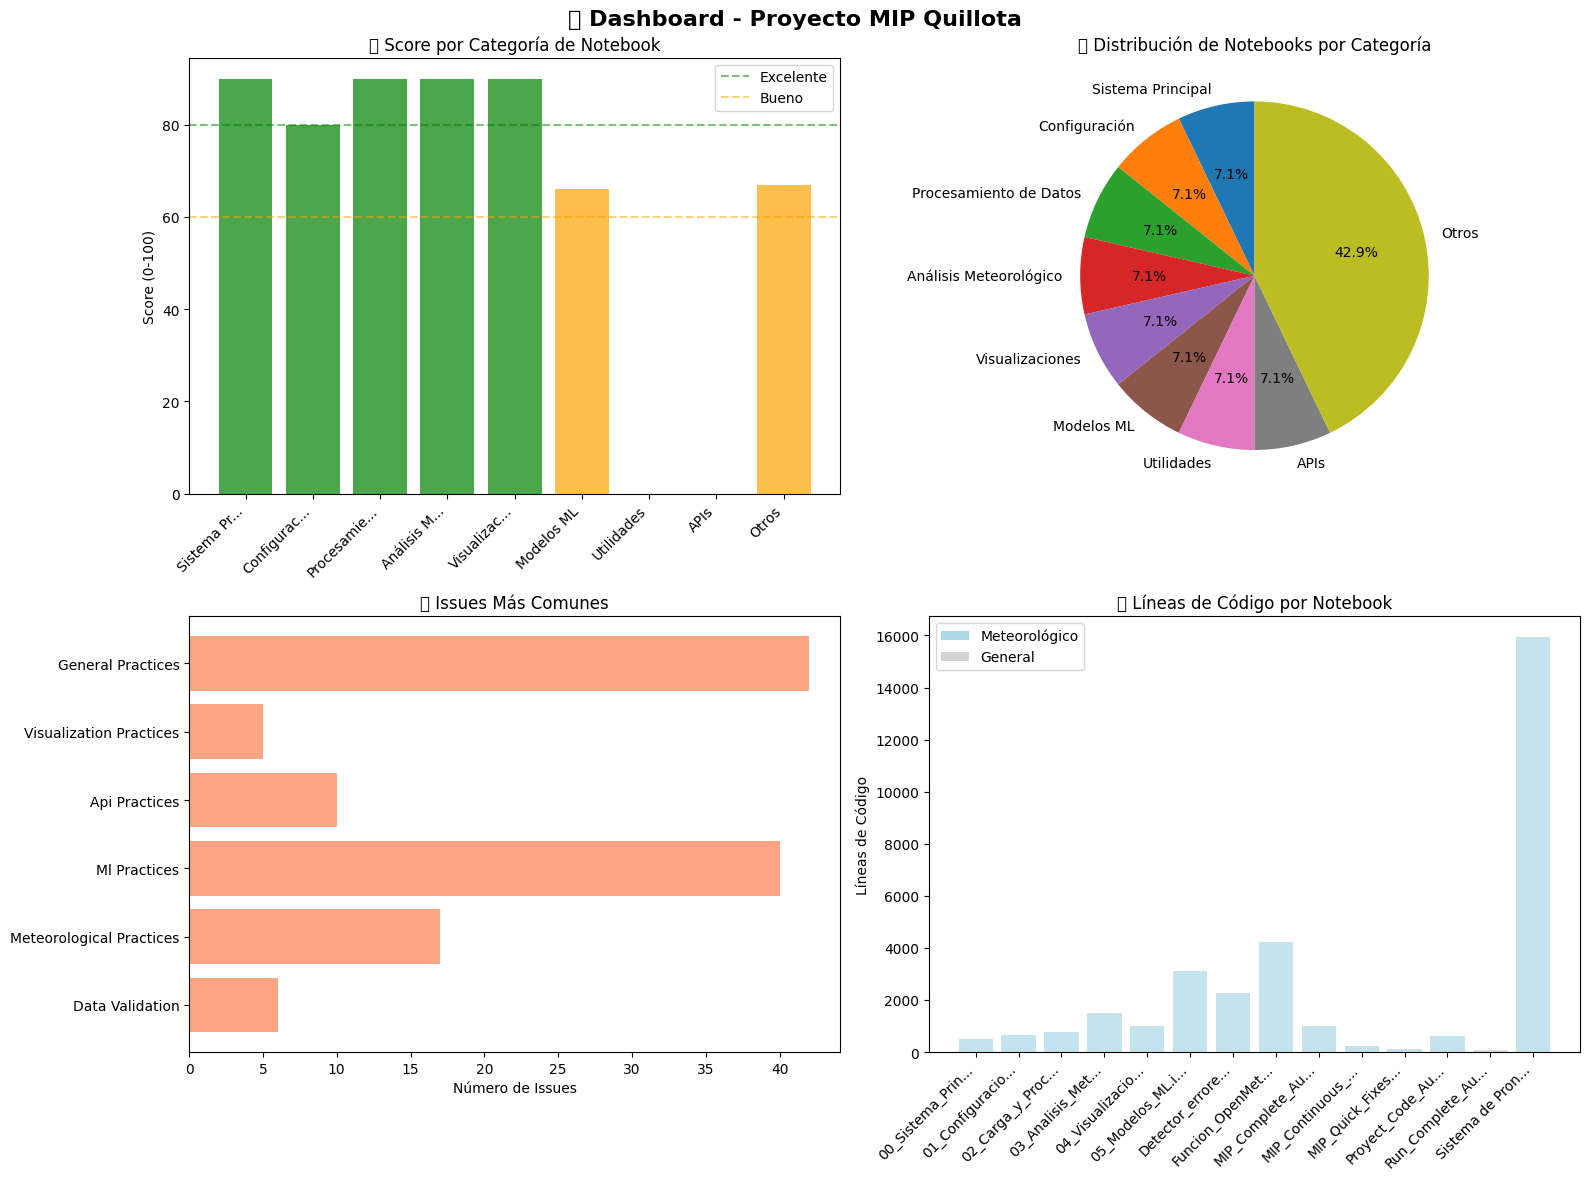

📋 Reporte completo guardado en: C:\Users\Alicia_Piero\Documents\Repo_AIEP\MIP_QUILLOTA\Proyecto_METGO_3D\MIP_Quillota_Audit_20250811_130550.json
📄 Reporte ejecutivo guardado en: C:\Users\Alicia_Piero\Documents\Repo_AIEP\MIP_QUILLOTA\Proyecto_METGO_3D\MIP_Executive_Report_20250811_130550.txt

3️⃣ STATUS ACTUAL DEL PROYECTO...
🌡️ MONITOR CONTINUO - PROYECTO MIP QUILLOTA
🕒 Último check: 2025-08-11 13:05:50

📊 ESTADO GENERAL:
  📁 Total notebooks: 14
  💾 Tamaño total: 7.5 MB
  🔥 Modificados hoy: 12

⚠️ ISSUES DETECTADOS:
  🔥 Alta actividad: 12 notebooks modificados recientemente

💡 RECOMENDACIONES:
  🔍 Ejecuta auditoría completa para análisis detallado
  📁 Considera organizar notebooks en subdirectorios


4️⃣ OPCIONES DISPONIBLES:
   📋 Los reportes se han guardado en tu directorio del proyecto
   🔧 Para aplicar fixes automáticos, ejecuta:
      fixer = MIPQuickFixer(PROJECT_PATH)
      fixer.fix_all_notebooks()
   📊 Para monitoreo continuo, ejecuta:
      monitor.start_monitoring(interval_m

In [1]:
# SUGERENCIA: Considera dividir esta celda en múltiples celdas más pequeñas
# SUGERENCIA: Considera dividir esta celda en múltiples celdas más pequeñas
# SUGERENCIA: Considera dividir esta celda en múltiples celdas más pequeñas
# SUGERENCIA: Considera dividir esta celda en múltiples celdas más pequeñas
# SUGERENCIA: Considera dividir esta celda en múltiples celdas más pequeñas
# SUGERENCIA: Considera dividir esta celda en múltiples celdas más pequeñas
# SUGERENCIA: Considera dividir esta celda en múltiples celdas más pequeñas
# SUGERENCIA: Considera dividir esta celda en múltiples celdas más pequeñas
# SUGERENCIA: Considera dividir esta celda en múltiples celdas más pequeñas
# Código mejorado - 2025-08-11
import os
import json
import nbformat
from pathlib import Path
import subprocess
import tempfile
from datetime import datetime
import pandas as pd
from IPython.display import display, HTML, Markdown, clear_output
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

try:
    from colorama import Fore, Style, init
    init(autoreset=True)
    COLORS_AVAILABLE = True
except ImportError:
    print("💡 Para colores, instala: pip install colorama")
    COLORS_AVAILABLE = False
    # Definir colores como strings vacíos si colorama no está disponible
    class DummyColor:
        GREEN = YELLOW = RED = ""
    Fore = DummyColor()

# CONFIGURACIÓN DEL PROYECTO
PROJECT_PATH = r"C:\Users\Alicia_Piero\Documents\Repo_AIEP\MIP_QUILLOTA\Proyecto_METGO_3D"

def show_project_overview():
    """Muestra un overview rápido del proyecto"""
    project_path = Path(PROJECT_PATH)
    
    print("🌡️ PROYECTO MIP QUILLOTA - OVERVIEW")
    print("="*50)
    
    notebooks = [nb for nb in project_path.glob("*.ipynb") if '.ipynb_checkpoints' not in str(nb)]
    print(f"📊 Total notebooks encontrados: {len(notebooks)}")
    
    for nb in notebooks:
        size_kb = nb.stat().st_size / 1024
        print(f"  - {nb.name}: {size_kb:.1f} KB")
    
    folders = ['data', 'docs', 'modelos_ml_quillota', 'notebooks', 'src', 'tests']
    print(f"\n📁 Estructura de carpetas:")
    for folder in folders:
        folder_path = project_path / folder
        if folder_path.exists():
            files_count = len(list(folder_path.glob("*")))
            print(f"  ✅ {folder}/: {files_count} archivos")
        else:
            print(f"  ❌ {folder}/: No existe")

class MIPQuillotaAuditor:
    def __init__(self, project_path):
        self.project_path = Path(project_path)
        self.notebooks = []
        self.audit_results = {}
        
        # Estructura específica del proyecto
        self.notebook_categories = {
            '00_Sistema_Principal': 'Sistema Principal',
            '01_Configuracion': 'Configuración',
            '02_Carga_y_Procesamiento': 'Procesamiento de Datos',
            '03_Analisis_Meteorologico': 'Análisis Meteorológico',
            '04_Visualizaciones': 'Visualizaciones',
            '05_Modelos_ML': 'Modelos ML',
            'Detector_errores': 'Utilidades',
            'Funcion_OpenMeteo': 'APIs',
            'Sistema de Pronostico': 'Pronósticos'
        }
    
    def scan_project_structure(self):
        """Escanea la estructura completa del proyecto"""
        print("🏗️  ESTRUCTURA DEL PROYECTO MIP QUILLOTA")
        print("="*60)
        
        # Escanear notebooks
        self.notebooks = [nb for nb in self.project_path.glob("*.ipynb") 
                         if '.ipynb_checkpoints' not in str(nb)]
        
        # Mostrar estructura
        folders = ['data', 'docs', 'modelos_ml_quillota', 'notebooks', 'src', 'tests']
        for folder in folders:
            folder_path = self.project_path / folder
            if folder_path.exists():
                files = list(folder_path.glob("*"))
                print(f"📁 {folder}/: {len(files)} archivos")
            else:
                print(f"📁 {folder}/: No existe")
        
        print(f"📊 Notebooks principales: {len(self.notebooks)}")
        for nb in self.notebooks:
            category = self.get_notebook_category(nb.name)
            print(f"  - {nb.name} ({category})")
        
        return self.notebooks
    
    def get_notebook_category(self, notebook_name):
        """Determina la categoría del notebook"""
        for key, category in self.notebook_categories.items():
            if key.lower() in notebook_name.lower():
                return category
        return 'Otros'
    
    def extract_code_from_notebook(self, notebook_path):
        """Extrae código con metadatos específicos"""
        try:
            with open(notebook_path, 'r', encoding='utf-8') as f:
                nb = nbformat.read(f, as_version=4)
        except Exception as e:
            print(f"❌ Error leyendo {notebook_path.name}: {e}")
            return []
        
        code_cells = []
        for i, cell in enumerate(nb.cells):
            if cell.cell_type == 'code' and cell.source.strip():
                code_cells.append({
                    'cell_index': i,
                    'content': cell.source,
                    'execution_count': cell.get('execution_count', 0),
                    'outputs': len(cell.get('outputs', [])),
                    'has_errors': any('error' in str(output).lower() for output in cell.get('outputs', []))
                })
        return code_cells
    
    def analyze_code_basic(self, code_content):
        """Análisis básico de código"""
        lines = code_content.split('\n')
        return {
            'total_lines': len(lines),
            'code_lines': len([l for l in lines if l.strip() and not l.strip().startswith('#')]),
            'comment_lines': len([l for l in lines if l.strip().startswith('#')]),
            'imports': len([l for l in lines if l.strip().startswith(('import ', 'from '))]),
            'functions': len([l for l in lines if 'def ' in l]),
            'long_lines': len([l for l in lines if len(l) > 88])
        }
    
    def analyze_meteorological_code(self, code_content):
        """Análisis específico para código meteorológico"""
        lines = code_content.split('\n')
        code_lower = code_content.lower()
        
        analysis = {
            'is_meteorological': False,
            'data_sources': [],
            'meteorological_variables': [],
            'time_handling': [],
            'api_usage': [],
            'data_quality_checks': []
        }
        
        # Detectar si es código meteorológico
        meteo_keywords = ['temperatura', 'precipitacion', 'humedad', 'viento', 'presion', 
                         'weather', 'meteo', 'clima', 'lluvia', 'openmeteo']
        analysis['is_meteorological'] = any(keyword in code_lower for keyword in meteo_keywords)
        
        # Detectar fuentes de datos
        if 'openmeteo' in code_lower:
            analysis['data_sources'].append('OpenMeteo API')
        if 'csv' in code_lower or 'excel' in code_lower:
            analysis['data_sources'].append('Archivos locales')
        
        # Variables meteorológicas
        meteo_vars = ['temperature', 'precipitation', 'humidity', 'wind_speed', 
                     'pressure', 'solar_radiation']
        for var in meteo_vars:
            if var in code_lower:
                analysis['meteorological_variables'].append(var)
        
        # Manejo temporal
        time_keywords = ['datetime', 'date', 'time', 'timestamp', 'resample', 'groupby']
        for keyword in time_keywords:
            if keyword in code_lower:
                analysis['time_handling'].append(keyword)
        
        # Uso de APIs
        if 'requests' in code_lower or 'api' in code_lower:
            analysis['api_usage'].append('API calls detected')
        
        return analysis
    
    def check_mip_best_practices(self, code_content):
        """Verifica mejores prácticas específicas para proyectos MIP meteorológicos"""
        issues = {
            'data_validation': [],
            'meteorological_practices': [],
            'ml_practices': [],
            'api_practices': [],
            'visualization_practices': [],
            'general_practices': []
        }
        
        lines = code_content.split('\n')
        code_lower = code_content.lower()
        
        # Validación de datos
        if 'pd.read_csv' in code_content and 'parse_dates' not in code_content:
            issues['data_validation'].append("Considera usar parse_dates para fechas en read_csv()")
        
        if ('isna()' not in code_content and 'isnull()' not in code_content and 
            'dropna()' not in code_content and 'fillna()' not in code_content and
            'df[' in code_content):
            issues['data_validation'].append("Verifica valores nulos en los datos")
        
        # Prácticas meteorológicas
        if any(var in code_lower for var in ['temperatura', 'temperature', 'temp']):
            if 'unit' not in code_lower and 'celsius' not in code_lower and '°c' not in code_lower:
                issues['meteorological_practices'].append("Especifica unidades para temperatura")
        
        if 'precipitacion' in code_lower or 'precipitation' in code_lower:
            if 'mm' not in code_lower:
                issues['meteorological_practices'].append("Especifica unidades para precipitación (mm)")
        
        # Prácticas de ML
        if any(ml_lib in code_content for ml_lib in ['sklearn', 'train_test_split', 'model']):
            if 'random_state' not in code_content:
                issues['ml_practices'].append("Usa random_state para reproducibilidad")
            
            if 'cross_validation' not in code_content and 'cross_val_score' not in code_content:
                issues['ml_practices'].append("Considera usar validación cruzada")
        
        # Prácticas de API
        if 'requests' in code_content:
            if 'try:' not in code_content or 'except' not in code_content:
                issues['api_practices'].append("Agrega manejo de errores para llamadas API")
            
            if 'sleep(' not in code_content and 'rate' not in code_lower:
                issues['api_practices'].append("Considera rate limiting para APIs")
        
        # Visualizaciones
        if any(plot in code_content for plot in ['plt.plot', 'plt.scatter', 'sns.']):
            if 'plt.title' not in code_content:
                issues['visualization_practices'].append("Agrega títulos a tus gráficos")
            
            if 'plt.xlabel' not in code_content or 'plt.ylabel' not in code_content:
                issues['visualization_practices'].append("Agrega labels a los ejes")
        
        # Prácticas generales
        if len([line for line in lines if line.strip()]) > 50:
            issues['general_practices'].append("Celda muy larga, considera dividir")
        
        return issues
    
    def generate_mip_suggestions(self, basic, meteo, practices, category):
        """Genera sugerencias específicas por categoría"""
        suggestions = []
        
        # Sugerencias por categoría de notebook
        if category == 'Configuración':
            if basic['imports'] > 20:
                suggestions.append("🔧 Considera organizar imports en módulos separados")
            suggestions.append("📋 Documenta las configuraciones principales")
        
        elif category == 'Procesamiento de Datos':
            if practices['data_validation']:
                suggestions.append("✅ Implementa validaciones robustas de datos")
            suggestions.append("💾 Guarda datos procesados en formato eficiente")
        
        elif category == 'Análisis Meteorológico':
            if not meteo['meteorological_variables']:
                suggestions.append("🌡️ Identifica claramente las variables meteorológicas")
            if practices['meteorological_practices']:
                suggestions.append("📊 Especifica unidades y rangos válidos")
        
        elif category == 'Modelos ML':
            if practices['ml_practices']:
                suggestions.append("🤖 Implementa validación cruzada y métricas")
            suggestions.append("💾 Guarda modelos entrenados")
        
        elif category == 'Visualizaciones':
            if practices['visualization_practices']:
                suggestions.append("📈 Mejora la calidad de gráficos")
            suggestions.append("🎨 Usa colores consistentes")
        
        # Sugerencias generales
        if basic['long_lines'] > 0:
            suggestions.append(f"📏 {basic['long_lines']} líneas muy largas")
        
        if basic['comment_lines'] / max(basic['code_lines'], 1) < 0.1:
            suggestions.append("💬 Agrega más comentarios explicativos")
        
        return suggestions
    
    def calculate_project_health_score(self, notebook_analysis):
        """Calcula score de salud específico para el proyecto"""
        base_score = 100
        
        # Penalizaciones por categoría
        penalties = {
            'data_validation': 15,
            'meteorological_practices': 10,
            'ml_practices': 12,
            'api_practices': 8,
            'visualization_practices': 5,
            'general_practices': 10
        }
        
        for cell in notebook_analysis.get('cells_analysis', []):
            best_practices = cell.get('best_practices', {})
            for category, issues in best_practices.items():
                if issues and category in penalties:
                    base_score -= min(len(issues) * penalties[category], penalties[category] * 2)
        
        return max(base_score, 0)
    
    def generate_mip_report(self):
        """Genera reporte específico para el proyecto MIP"""
        if not self.notebooks:
            self.scan_project_structure()
        
        print(f"\n🔍 ANÁLISIS DE CÓDIGO - PROYECTO MIP QUILLOTA")
        print("="*60)
        
        notebook_scores = {}
        category_analysis = {}
        
        for notebook_path in self.notebooks:
            print(f"\n📝 Analizando: {notebook_path.name}")
            
            category = self.get_notebook_category(notebook_path.name)
            code_cells = self.extract_code_from_notebook(notebook_path)
            
            notebook_analysis = {
                'path': str(notebook_path),
                'name': notebook_path.name,
                'category': category,
                'total_cells': len(code_cells),
                'cells_with_output': sum(1 for cell in code_cells if cell['outputs'] > 0),
                'cells_with_errors': sum(1 for cell in code_cells if cell['has_errors']),
                'cells_analysis': []
            }
            
            for cell in code_cells:
                if cell['content'].strip():
                    # Análisis meteorológico específico
                    meteo_analysis = self.analyze_meteorological_code(cell['content'])
                    
                    # Mejores prácticas MIP
                    best_practices = self.check_mip_best_practices(cell['content'])
                    
                    # Análisis básico
                    basic_analysis = self.analyze_code_basic(cell['content'])
                    
                    cell_analysis = {
                        'cell_index': cell['cell_index'],
                        'basic_analysis': basic_analysis,
                        'meteorological_analysis': meteo_analysis,
                        'best_practices': best_practices,
                        'suggestions': self.generate_mip_suggestions(
                            basic_analysis, meteo_analysis, best_practices, category
                        )
                    }
                    
                    notebook_analysis['cells_analysis'].append(cell_analysis)
            
            # Calcular score
            notebook_analysis['health_score'] = self.calculate_project_health_score(notebook_analysis)
            notebook_scores[notebook_path.name] = notebook_analysis['health_score']
            
            # Agrupar por categoría
            if category not in category_analysis:
                category_analysis[category] = []
            category_analysis[category].append(notebook_analysis)
            
            self.audit_results[notebook_path.name] = notebook_analysis
        
        # Mostrar resultados
        self._display_mip_results(notebook_scores, category_analysis)
        
        # Crear dashboard
        self._create_mip_dashboard(category_analysis)
        
        # Guardar reporte
        self._save_mip_report()
    
    def _display_mip_results(self, notebook_scores, category_analysis):
        """Muestra resultados específicos del proyecto"""
        # Score general del proyecto
        avg_score = sum(notebook_scores.values()) / len(notebook_scores) if notebook_scores else 0
        
        print(f"\n{'='*60}")
        print(f"📊 RESUMEN GENERAL DEL PROYECTO")
        print(f"{'='*60}")
        print(f"🎯 Score promedio del proyecto: {avg_score:.1f}/100")
        
        if avg_score >= 85:
            print(f"{Fore.GREEN}🏆 ¡Excelente! Proyecto en muy buen estado")
        elif avg_score >= 70:
            print(f"{Fore.YELLOW}🔧 Bien, pero con algunas mejoras pendientes")
        else:
            print(f"{Fore.RED}⚠️  Necesita atención urgente")
        
        # Análisis por categoría
        print(f"\n📋 ANÁLISIS POR CATEGORÍA:")
        for category, notebooks in category_analysis.items():
            avg_cat_score = sum(nb['health_score'] for nb in notebooks) / len(notebooks)
            total_issues = sum(
                len(issues) for nb in notebooks 
                for cell in nb.get('cells_analysis', [])
                for issues in cell.get('best_practices', {}).values()
            )
            
            color = Fore.GREEN if avg_cat_score >= 80 else Fore.YELLOW if avg_cat_score >= 60 else Fore.RED
            print(f"  {color}{category}: {avg_cat_score:.1f}/100 ({total_issues} issues)")
        
        # Top issues del proyecto
        print(f"\n🔍 PRINCIPALES ÁREAS DE MEJORA:")
        all_issues = {}
        for notebook_data in self.audit_results.values():
            for cell in notebook_data.get('cells_analysis', []):
                for category, issues in cell.get('best_practices', {}).items():
                    if category not in all_issues:
                        all_issues[category] = 0
                    all_issues[category] += len(issues)
        
        sorted_issues = sorted(all_issues.items(), key=lambda x: x[1], reverse=True)
        for category, count in sorted_issues[:5]:
            if count > 0:
                print(f"  • {category.replace('_', ' ').title()}: {count} issues")
    
    def _create_mip_dashboard(self, category_analysis):
        """Dashboard específico para el proyecto MIP"""
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('🌡️ Dashboard - Proyecto MIP Quillota', fontsize=16, fontweight='bold')
        
        # 1. Score por categoría
        categories = list(category_analysis.keys())
        cat_scores = [
            sum(nb['health_score'] for nb in notebooks) / len(notebooks)
            for notebooks in category_analysis.values()
        ]
        
        colors = ['green' if s >= 80 else 'orange' if s >= 60 else 'red' for s in cat_scores]
        axes[0,0].bar(range(len(categories)), cat_scores, color=colors, alpha=0.7)
        axes[0,0].set_title('🎯 Score por Categoría de Notebook')
        axes[0,0].set_ylabel('Score (0-100)')
        axes[0,0].set_xticks(range(len(categories)))
        axes[0,0].set_xticklabels([cat[:10] + '...' if len(cat) > 10 else cat for cat in categories], 
                                  rotation=45, ha='right')
        axes[0,0].axhline(y=80, color='green', linestyle='--', alpha=0.5, label='Excelente')
        axes[0,0].axhline(y=60, color='orange', linestyle='--', alpha=0.5, label='Bueno')
        axes[0,0].legend()
        
        # 2. Distribución de notebooks por categoría
        nb_counts = [len(notebooks) for notebooks in category_analysis.values()]
        if nb_counts:  # Solo si hay datos
            axes[0,1].pie(nb_counts, labels=categories, autopct='%1.1f%%', startangle=90)
            axes[0,1].set_title('📊 Distribución de Notebooks por Categoría')
        
        # 3. Issues más comunes
        all_issues = {}
        for notebook_data in self.audit_results.values():
            for cell in notebook_data.get('cells_analysis', []):
                for category, issues in cell.get('best_practices', {}).items():
                    if category not in all_issues:
                        all_issues[category] = 0
                    all_issues[category] += len(issues)
        
        if all_issues:
            issue_categories = list(all_issues.keys())[:6]  # Top 6
            issue_counts = [all_issues[cat] for cat in issue_categories]
            
            axes[1,0].barh(range(len(issue_categories)), issue_counts, color='coral', alpha=0.7)
            axes[1,0].set_title('🔍 Issues Más Comunes')
            axes[1,0].set_xlabel('Número de Issues')
            axes[1,0].set_yticks(range(len(issue_categories)))
            axes[1,0].set_yticklabels([cat.replace('_', ' ').title() for cat in issue_categories])
        
        # 4. Evolución de complejidad (líneas de código por notebook)
        notebook_names = []
        total_lines = []
        meteo_notebooks = []
        
        for notebook_name, data in self.audit_results.items():
            notebook_names.append(notebook_name[:15] + '...' if len(notebook_name) > 15 else notebook_name)
            lines = sum(cell.get('basic_analysis', {}).get('total_lines', 0) 
                       for cell in data.get('cells_analysis', []))
            total_lines.append(lines)
            
            # Verificar si es notebook meteorológico
            is_meteo = any(cell.get('meteorological_analysis', {}).get('is_meteorological', False)
                          for cell in data.get('cells_analysis', []))
            meteo_notebooks.append(is_meteo)
        
        if notebook_names and total_lines:
            colors_meteo = ['lightblue' if meteo else 'lightgray' for meteo in meteo_notebooks]
            axes[1,1].bar(range(len(notebook_names)), total_lines, color=colors_meteo, alpha=0.7)
            axes[1,1].set_title('📏 Líneas de Código por Notebook')
            axes[1,1].set_ylabel('Líneas de Código')
            axes[1,1].set_xticks(range(len(notebook_names)))
            axes[1,1].set_xticklabels(notebook_names, rotation=45, ha='right')
            
            # Leyenda para el último gráfico
            from matplotlib.patches import Patch
            legend_elements = [Patch(facecolor='lightblue', label='Meteorológico'),
                              Patch(facecolor='lightgray', label='General')]
            axes[1,1].legend(handles=legend_elements)
        
        plt.tight_layout()
        plt.show()
    
    def _save_mip_report(self):
        """Guarda reporte específico del proyecto MIP"""
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        
        # Reporte JSON completo
        report_path = self.project_path / f"MIP_Quillota_Audit_{timestamp}.json"
        json_data = {}
        for k, v in self.audit_results.items():
            json_data[k] = v
            if 'path' in v:
                json_data[k]['path'] = str(v['path'])
        
        with open(report_path, 'w', encoding='utf-8') as f:
            json.dump(json_data, f, indent=2, ensure_ascii=False)
        
        # Reporte ejecutivo en texto
        executive_path = self.project_path / f"MIP_Executive_Report_{timestamp}.txt"
        with open(executive_path, 'w', encoding='utf-8') as f:
            f.write("REPORTE EJECUTIVO - PROYECTO MIP QUILLOTA\n")
            f.write("="*60 + "\n")
            f.write(f"Fecha: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")
            
            # Resumen general
            scores = [data['health_score'] for data in self.audit_results.values()]
            avg_score = sum(scores) / len(scores) if scores else 0
            
            f.write(f"RESUMEN GENERAL:\n")
            f.write(f"- Score promedio del proyecto: {avg_score:.1f}/100\n")
            f.write(f"- Total de notebooks analizados: {len(self.audit_results)}\n")
            f.write(f"- Estado general: ")
            
            if avg_score >= 85:
                f.write("EXCELENTE\n")
            elif avg_score >= 70:
                f.write("BUENO (con mejoras pendientes)\n")
            else:
                f.write("NECESITA ATENCIÓN\n")
            
            f.write(f"\nDETALLE POR NOTEBOOK:\n")
            f.write("-" * 40 + "\n")
            
            for notebook_name, data in self.audit_results.items():
                f.write(f"\n{notebook_name}:\n")
                f.write(f"  - Categoría: {data['category']}\n")
                f.write(f"  - Score: {data['health_score']:.1f}/100\n")
                f.write(f"  - Total celdas: {data['total_cells']}\n")
                f.write(f"  - Celdas con errores: {data['cells_with_errors']}\n")
                
                # Top 3 sugerencias
                all_suggestions = []
                for cell in data.get('cells_analysis', []):
                    all_suggestions.extend(cell.get('suggestions', []))
                
                unique_suggestions = list(set(all_suggestions))[:3]
                if unique_suggestions:
                    f.write(f"  - Principales sugerencias:\n")
                    for suggestion in unique_suggestions:
                        f.write(f"    • {suggestion}\n")
        
        print(f"📋 Reporte completo guardado en: {report_path}")
        print(f"📄 Reporte ejecutivo guardado en: {executive_path}")

class MIPProjectMonitor:
    def __init__(self, project_path):
        self.project_path = Path(project_path)
        self.monitoring_data = []
        self.last_check = {}
    
    def check_project_status(self):
        """Verifica el estado actual del proyecto"""
        notebooks = [nb for nb in self.project_path.glob("*.ipynb") if '.ipynb_checkpoints' not in str(nb)]
        
        status = {
            'timestamp': datetime.now().isoformat(),
            'total_notebooks': len(notebooks),
            'total_size_mb': sum(nb.stat().st_size for nb in notebooks) / (1024*1024),
            'modified_recently': 0,
            'notebooks_status': {}
        }
        
        # Verificar modificaciones recientes (últimas 24 horas)
        current_time = time.time()
        for nb in notebooks:
            mod_time = nb.stat().st_mtime
            is_recent = (current_time - mod_time) < 86400  # 24 horas
            
            if is_recent:
                status['modified_recently'] += 1
            
            status['notebooks_status'][nb.name] = {
                'size_kb': nb.stat().st_size / 1024,
                'modified': datetime.fromtimestamp(mod_time).isoformat(),
                'modified_recently': is_recent
            }
        
        return status
    
    def detect_issues(self, current_status):
        """Detecta posibles problemas en el proyecto"""
        issues = []
        
        # Issue 1: Notebooks muy grandes
        for nb_name, nb_data in current_status['notebooks_status'].items():
            if nb_data['size_kb'] > 5000:  # > 5MB
                issues.append(f"⚠️ {nb_name} es muy grande ({nb_data['size_kb']:.1f} KB)")
        
        # Issue 2: Mucha actividad reciente
        if current_status['modified_recently'] > 3:
            issues.append(f"🔥 Alta actividad: {current_status['modified_recently']} notebooks modificados recientemente")
        
        # Issue 3: Comparar con check anterior
        if self.last_check:
            size_growth = current_status['total_size_mb'] - self.last_check.get('total_size_mb', 0)
            if size_growth > 10:  # Crecimiento > 10MB
                issues.append(f"📈 Proyecto creció significativamente: +{size_growth:.1f} MB")
        
        return issues
    
    def generate_recommendations(self, current_status, issues):
        """Genera recomendaciones basadas en el estado"""
        recommendations = []
        
        if current_status['total_size_mb'] > 50:
            recommendations.append("💾 Considera limpiar outputs de notebooks para reducir tamaño")
        
        if current_status['modified_recently'] == 0:
            recommendations.append("😴 No hay actividad reciente. ¿Proyecto pausado?")
        
        if len(issues) > 0:
            recommendations.append("🔍 Ejecuta auditoría completa para análisis detallado")
        
        if current_status['total_notebooks'] > 10:
            recommendations.append("📁 Considera organizar notebooks en subdirectorios")
        
        return recommendations
    
    def display_dashboard(self, current_status, issues, recommendations):
        """Muestra dashboard en tiempo real"""
        print("🌡️ MONITOR CONTINUO - PROYECTO MIP QUILLOTA")
        print("="*60)
        print(f"🕒 Último check: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
        print()
        
        # Estado general
        print("📊 ESTADO GENERAL:")
        print(f"  📁 Total notebooks: {current_status['total_notebooks']}")
        print(f"  💾 Tamaño total: {current_status['total_size_mb']:.1f} MB")
        print(f"  🔥 Modificados hoy: {current_status['modified_recently']}")
        print()
        
        # Issues encontrados
        if issues:
            print("⚠️ ISSUES DETECTADOS:")
            for issue in issues:
                print(f"  {issue}")
            print()
        else:
            print("✅ No se detectaron issues\n")
        
        # Recomendaciones
        if recommendations:
            print("💡 RECOMENDACIONES:")
            for rec in recommendations:
                print(f"  {rec}")
            print()

def main_audit_workflow():
    """Flujo principal de auditoría"""
    print("🌡️ AUDITORÍA COMPLETA - PROYECTO MIP QUILLOTA")
    print("="*60)
    
    # Paso 1: Overview rápido
    print("\n1️⃣ REALIZANDO OVERVIEW DEL PROYECTO...")
    show_project_overview()
    
    # Paso 2: Auditoría completa
    print("\n2️⃣ EJECUTANDO AUDITORÍA COMPLETA...")
    auditor = MIPQuillotaAuditor(PROJECT_PATH)
    auditor.generate_mip_report()
    
    # Paso 3: Check de monitoreo
    print("\n3️⃣ STATUS ACTUAL DEL PROYECTO...")
    monitor = MIPProjectMonitor(PROJECT_PATH)
    status = monitor.check_project_status()
    issues = monitor.detect_issues(status)
    recommendations = monitor.generate_recommendations(status, issues)
    monitor.display_dashboard(status, issues, recommendations)
    
    print("\n4️⃣ OPCIONES DISPONIBLES:")
    print("   📋 Los reportes se han guardado en tu directorio del proyecto")
    print("   🔧 Para aplicar fixes automáticos, ejecuta:")
    print("      fixer = MIPQuickFixer(PROJECT_PATH)")
    print("      fixer.fix_all_notebooks()")
    print("   📊 Para monitoreo continuo, ejecuta:")
    print("      monitor.start_monitoring(interval_minutes=5, duration_hours=1)")
    
    print(f"\n🎉 AUDITORÍA COMPLETADA!")
    print(f"📁 Revisa los archivos generados en: {PROJECT_PATH}")

def express_audit():
    """Auditoría rápida para uso diario"""
    print("⚡ AUDITORÍA EXPRESS - MIP QUILLOTA")
    print("="*40)
    
    auditor = MIPQuillotaAuditor(PROJECT_PATH)
    auditor.scan_project_structure()
    
    # Solo análisis básico
    notebooks = auditor.notebooks[:3]  # Solo primeros 3 notebooks
    print(f"\n🔍 Analizando {len(notebooks)} notebooks principales...")
    
    total_project_issues = 0
    
    for notebook in notebooks:
        code_cells = auditor.extract_code_from_notebook(notebook)
        total_issues = 0
        
        for cell in code_cells[:2]:  # Solo primeras 2 celdas por notebook
            if cell['content'].strip():
                practices = auditor.check_mip_best_practices(cell['content'])
                issues = sum(len(issues) for issues in practices.values())
                total_issues += issues
        
        status = "🟢" if total_issues < 3 else "🟡" if total_issues < 8 else "🔴"
        print(f"  {status} {notebook.name}: {total_issues} issues encontrados")
        total_project_issues += total_issues
    
    print(f"\n📊 RESUMEN EXPRESS:")
    print(f"Total issues encontrados: {total_project_issues}")
    
    if total_project_issues < 10:
        print("✅ Proyecto en buen estado general")
    elif total_project_issues < 25:
        print("🔧 Algunas mejoras recomendadas")
    else:
        print("⚠️  Se recomienda auditoría completa")
    
    print(f"✅ Auditoría express completada")

class MIPQuickFixer:
    def __init__(self, project_path):
        self.project_path = Path(project_path)
        self.fixes_applied = {}
    
    def apply_meteorological_fixes(self, notebook_path):
        """Aplica fixes específicos para notebooks meteorológicos"""
        print(f"🔧 Aplicando fixes a: {notebook_path.name}")
        
        # Crear backup primero
        backup_path = notebook_path.with_suffix('.backup.ipynb')
        import shutil
        shutil.copy2(notebook_path, backup_path)
        
        try:
            with open(notebook_path, 'r', encoding='utf-8') as f:
                nb = nbformat.read(f, as_version=4)
        except Exception as e:
            print(f"❌ Error leyendo {notebook_path.name}: {e}")
            return 0
        
        fixes_count = 0
        
        for i, cell in enumerate(nb.cells):
            if cell.cell_type == 'code' and cell.source.strip():
                original_code = cell.source
                fixed_code = original_code
                
                # Fix 1: Agregar parse_dates a read_csv meteorológicos
                if 'pd.read_csv' in fixed_code and 'meteo' in fixed_code.lower():
                    if 'parse_dates' not in fixed_code:
                        fixed_code = fixed_code.replace(
                            'pd.read_csv(',
                            'pd.read_csv(\n    # Auto-fix: parsing fechas\n    parse_dates=True,\n    '
                        )
                        fixes_count += 1
                
                # Fix 2: Agregar títulos a gráficos meteorológicos
                if ('plt.plot' in fixed_code or 'plt.scatter' in fixed_code) and 'plt.title' not in fixed_code:
                    if any(word in fixed_code.lower() for word in ['temperatura', 'precipitacion', 'weather']):
                        fixed_code += '\n# Auto-fix: Título agregado\nplt.title("Análisis Meteorológico")'
                        fixes_count += 1
                
                # Fix 3: Agregar comentarios a imports meteorológicos
                if 'import' in fixed_code and any(lib in fixed_code for lib in ['requests', 'openmeteo']):
                    if not fixed_code.strip().startswith('#'):
                        fixed_code = '# Imports para análisis meteorológico\n' + fixed_code
                        fixes_count += 1
                
                # Fix 4: Agregar validación básica de datos
                if 'df[' in fixed_code and 'dropna()' not in fixed_code and 'isna()' not in fixed_code:
                    if len(fixed_code.split('\n')) < 10:  # Solo para celdas pequeñas
                        fixed_code += '\n# Auto-fix: Validación básica\n# df.info()  # Descomenta para revisar datos'
                        fixes_count += 1
                
                # Fix 5: Mejorar manejo de errores en APIs
                if 'requests.get' in fixed_code and 'try:' not in fixed_code:
                    fixed_code = '# Auto-fix: Manejo de errores agregado\ntry:\n' + \
                               '\n'.join('    ' + line for line in fixed_code.split('\n')) + \
                               '\nexcept requests.exceptions.RequestException as e:\n' + \
                               '    print(f"Error en API: {e}")'
                    fixes_count += 1
                
                cell.source = fixed_code
        
        # Guardar notebook modificado
        try:
            with open(notebook_path, 'w', encoding='utf-8') as f:
                nbformat.write(nb, f)
        except Exception as e:
            print(f"❌ Error guardando {notebook_path.name}: {e}")
            return 0
        
        self.fixes_applied[notebook_path.name] = fixes_count
        print(f"✅ {fixes_count} fixes aplicados. Backup en: {backup_path.name}")
        
        return fixes_count
    
    def fix_all_notebooks(self):
        """Aplica fixes a todos los notebooks"""
        notebooks = [nb for nb in self.project_path.glob("*.ipynb") if '.backup' not in str(nb)]
        total_fixes = 0
        
        print("🛠️ Aplicando fixes automáticos...")
        print("⚠️  Se crearán backups de seguridad...")
        
        for notebook in notebooks:
            try:
                fixes = self.apply_meteorological_fixes(notebook)
                total_fixes += fixes
            except Exception as e:
                print(f"❌ Error procesando {notebook.name}: {e}")
        
        # Generar reporte de fixes
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        report_path = self.project_path / f"fixes_report_{timestamp}.json"
        
        try:
            with open(report_path, 'w', encoding='utf-8') as f:
                json.dump(self.fixes_applied, f, indent=2)
        except Exception as e:
            print(f"⚠️ Error guardando reporte: {e}")
        
        print(f"\n🎯 RESUMEN DE FIXES APLICADOS:")
        print("="*40)
        for notebook, fixes_count in self.fixes_applied.items():
            status = "✅" if fixes_count > 0 else "ℹ️"
            print(f"{status} {notebook}: {fixes_count} fixes")
        
        print(f"\n📊 Total de fixes aplicados: {total_fixes}")
        print(f"📋 Reporte guardado en: {report_path}")
        
        if total_fixes > 0:
            print(f"\n⚠️  IMPORTANTE:")
            print(f"- Se crearon backups (.backup.ipynb) de todos los notebooks modificados")
            print(f"- Revisa los cambios antes de eliminar los backups")
            print(f"- Ejecuta las celdas modificadas para verificar que funcionan correctamente")
        
        return total_fixes

# Funciones de utilidad adicionales
def quick_check():
    """Realiza un check rápido del proyecto sin generar archivos"""
    print("⚡ CHECK RÁPIDO - MIP QUILLOTA")
    print("="*30)
    
    project_path = Path(PROJECT_PATH)
    notebooks = [nb for nb in project_path.glob("*.ipynb") if '.ipynb_checkpoints' not in str(nb)]
    
    total_size = sum(nb.stat().st_size for nb in notebooks) / (1024*1024)
    
    print(f"📊 {len(notebooks)} notebooks encontrados")
    print(f"💾 Tamaño total: {total_size:.1f} MB")
    
    # Notebooks más grandes
    large_notebooks = [(nb.name, nb.stat().st_size/1024) for nb in notebooks if nb.stat().st_size > 1024*1024]
    if large_notebooks:
        print(f"⚠️  Notebooks grandes (>1MB):")
        for name, size in large_notebooks:
            print(f"   - {name}: {size:.1f} KB")
    else:
        print("✅ Todos los notebooks tienen tamaño razonable")

def clean_project():
    """Limpia archivos temporales y backups antiguos"""
    print("🧹 LIMPIEZA DEL PROYECTO")
    print("="*25)
    
    project_path = Path(PROJECT_PATH)
    
    # Limpiar checkpoints
    checkpoints = list(project_path.glob("**/.ipynb_checkpoints"))
    for checkpoint in checkpoints:
        try:
            import shutil
            shutil.rmtree(checkpoint)
            print(f"🗑️  Eliminado: {checkpoint}")
        except Exception as e:
            print(f"❌ Error eliminando {checkpoint}: {e}")
    
    # Mostrar backups disponibles
    backups = list(project_path.glob("*.backup.ipynb"))
    if backups:
        print(f"\n📦 {len(backups)} archivos backup encontrados:")
        for backup in backups:
            age_days = (time.time() - backup.stat().st_mtime) / 86400
            print(f"   - {backup.name} ({age_days:.1f} días)")
        
        print(f"\n💡 Para eliminar backups antiguos (>7 días), ejecuta:")
        print(f"   clean_old_backups()")
    else:
        print("✅ No hay backups para limpiar")

def clean_old_backups(days_old=7):
    """Elimina backups más antiguos que X días"""
    project_path = Path(PROJECT_PATH)
    backups = list(project_path.glob("*.backup.ipynb"))
    
    current_time = time.time()
    deleted_count = 0
    
    for backup in backups:
        age_days = (current_time - backup.stat().st_mtime) / 86400
        if age_days > days_old:
            try:
                backup.unlink()
                print(f"🗑️  Eliminado backup antiguo: {backup.name}")
                deleted_count += 1
            except Exception as e:
                print(f"❌ Error eliminando {backup.name}: {e}")
    
    print(f"✅ {deleted_count} backups antiguos eliminados")

# MENÚ INTERACTIVO
def show_menu():
    """Muestra menú de opciones disponibles"""
    print("\n🌡️ MENÚ - AUDITOR MIP QUILLOTA")
    print("="*35)
    print("1 - Auditoría Completa (recomendado)")
    print("2 - Auditoría Express (rápida)")
    print("3 - Check Rápido (solo overview)")
    print("4 - Aplicar Fixes Automáticos")
    print("5 - Limpiar Proyecto")
    print("6 - Monitoreo Continuo")
    print("0 - Salir")
    print("-"*35)

def interactive_menu():
    """Menú interactivo para el usuario"""
    while True:
        show_menu()
        try:
            option = input("Selecciona una opción: ").strip()
            
            if option == "1":
                main_audit_workflow()
            elif option == "2":
                express_audit()
            elif option == "3":
                quick_check()
            elif option == "4":
                print("⚠️  ADVERTENCIA: Se crearán backups automáticamente")
                confirm = input("¿Continuar con fixes automáticos? (s/n): ")
                if confirm.lower() in ['s', 'si', 'sí', 'y', 'yes']:
                    fixer = MIPQuickFixer(PROJECT_PATH)
                    fixer.fix_all_notebooks()
                else:
                    print("❌ Operación cancelada")
            elif option == "5":
                clean_project()
            elif option == "6":
                try:
                    minutes = int(input("Intervalo en minutos (default: 5): ") or 5)
                    hours = float(input("Duración en horas (default: 1): ") or 1)
                    monitor = MIPProjectMonitor(PROJECT_PATH)
                    monitor.start_monitoring(interval_minutes=minutes, duration_hours=hours)
                except ValueError:
                    print("❌ Valores inválidos")
            elif option == "0":
                print("👋 ¡Hasta luego!")
                break
            else:
                print("❌ Opción inválida")
        
        except KeyboardInterrupt:
            print("\n👋 Saliendo...")
            break
        except Exception as e:
            print(f"❌ Error: {e}")

# EJECUCIÓN PRINCIPAL
if __name__ == "__main__":
    # Verificar si el proyecto existe
    if not Path(PROJECT_PATH).exists():
        print(f"❌ No se encontró el proyecto en: {PROJECT_PATH}")
        print("🔧 Verifica la ruta del proyecto")
    else:
        print("🚀 AUDITOR DE CÓDIGO - PROYECTO MIP QUILLOTA")
        print("="*50)
        
        # Modo automático o interactivo
        mode = input("Modo de ejecución:\n1 - Automático (auditoría completa)\n2 - Interactivo (menú)\nOpción: ").strip()
        
        if mode == "2":
            interactive_menu()
        else:
            # Ejecución automática
            audit_type = input("Selecciona tipo de auditoría:\n1 - Completa (recomendado)\n2 - Express (rápida)\nOpción: ")
            
            if audit_type == "2":
                express_audit()
            else:
                main_audit_workflow()

In [2]:
# Para revisar notebooks específicos con más detalle
critical_notebooks = [
    "Detector_errores.ipynb",
    "Funcion_OpenMeteo.ipynb", 
    "05_Modelos_ML.ipynb"
]

# Ejecutar auditoría detallada de notebooks críticos
def audit_critical_notebooks():
    auditor = MIPQuillotaAuditor(PROJECT_PATH)
    for notebook_name in critical_notebooks:
        notebook_path = Path(PROJECT_PATH) / notebook_name
        if notebook_path.exists():
            print(f"\n🔍 ANÁLISIS DETALLADO: {notebook_name}")
            print("="*50)
            code_cells = auditor.extract_code_from_notebook(notebook_path)
            
            for i, cell in enumerate(code_cells[:3]):  # Primeras 3 celdas
                if cell['content'].strip():
                    practices = auditor.check_mip_best_practices(cell['content'])
                    print(f"\n📱 Celda {i+1}:")
                    
                    for category, issues in practices.items():
                        if issues:
                            print(f"  ❌ {category.replace('_', ' ').title()}:")
                            for issue in issues[:2]:  # Top 2 issues
                                print(f"    • {issue}")

audit_critical_notebooks()


🔍 ANÁLISIS DETALLADO: Detector_errores.ipynb

📱 Celda 1:

📱 Celda 2:
  ❌ Data Validation:
    • Considera usar parse_dates para fechas en read_csv()
  ❌ Ml Practices:
    • Usa random_state para reproducibilidad
  ❌ Visualization Practices:
    • Agrega títulos a tus gráficos
    • Agrega labels a los ejes
  ❌ General Practices:
    • Celda muy larga, considera dividir

📱 Celda 3:
  ❌ General Practices:
    • Celda muy larga, considera dividir

🔍 ANÁLISIS DETALLADO: Funcion_OpenMeteo.ipynb

📱 Celda 1:
  ❌ Data Validation:
    • Verifica valores nulos en los datos
  ❌ Ml Practices:
    • Usa random_state para reproducibilidad
    • Considera usar validación cruzada
  ❌ General Practices:
    • Celda muy larga, considera dividir

📱 Celda 2:
  ❌ Ml Practices:
    • Usa random_state para reproducibilidad
    • Considera usar validación cruzada
  ❌ General Practices:
    • Celda muy larga, considera dividir

📱 Celda 3:
  ❌ General Practices:
    • Celda muy larga, considera dividir

🔍 ANÁL